In [1]:
%pylab inline
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex',unicode=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rcParams['figure.figsize']=(8.27,5.83)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def olsim(x,y,sx,sy):
	a=0
	for i in range(3):
		w=1/(sy**2+(a*sx)**2)
		Sw=sum(w)
		ax=sum(x*w)/Sw
		ay=sum(y*w)/Sw
		axy=sum(x*y*w)/Sw
		ax2=sum((x**2+sx**2)*w)/Sw
		ay2=sum((y**2+sy**2)*w)/Sw
		a=(axy-ax*ay)/(ax2-ax*ax)
	b=(ax2*ay-ax*axy)/(ax2-ax*ax)
	n=len(x)
	chi2=sum((y-a*x-b)**2/(sy**2+(a*sx)**2))
	s02=n/(n-2)*(ay2-ay*ay-(axy-ax*ay)*(axy-ax*ay)/(ax2-ax*ax))
	sa2=s02/n/(ax2-ax*ax)
	sb2=sa2*ax2
	sa=sqrt(sa2)
	sb=sqrt(sb2)
	return a,b,sa,sb,chi2

# Part A

In [3]:
n1,x1=genfromtxt("a.csv",delimiter=',',skip_header=1).T
len(n1)

6

In [4]:
sx=0.14
n=n1[:-1]
z=x1[:-1]-x1[-1]
Lambda=5461e-7 #mm
Ds=0.3 #mm

3.56896551724 0.125 0.886289836696 0.277845542065 3.52304714989
0.279214044702 0.0346689494317


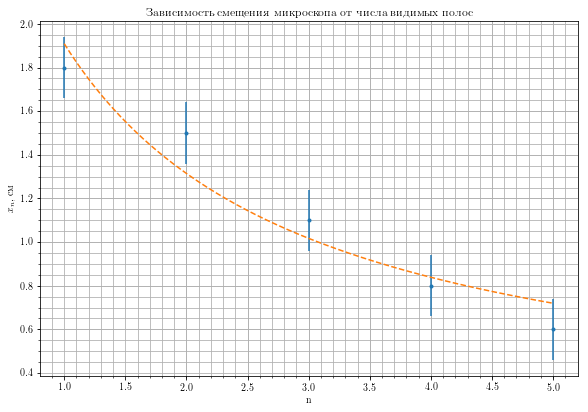

In [5]:
errorbar(n,z,yerr=sx,fmt='.')
arg=arange(1,5,0.01)
#zt=0.1*Ds**2/4/(n+1)/Lambda
#plot(arg,0.1*Ds**2/4/(arg+1)/Lambda)
a,b,sa,sb,chi2=olsim(1/(n+1),z,zeros(len(n)),sx)
print(a,b,sa,sb,chi2)
plot(arg,a/(arg+1)+b,"--")
Dt=sqrt(40*a*Lambda) #mm
sDt=sa/a*Dt/2
print(Dt,sDt)
#graph options
xlabel("n")
ylabel(r"$x_n$, см")
title("Зависимость смещения микроскопа от числа видимых полос")
minorticks_on()
grid(which='both')
tight_layout()
savefig("graph1.pdf")

# Part B

In [6]:
m,xm=genfromtxt("b.csv",delimiter=',',skip_header=1).T
len(m)

6

0.487857142857 1.47666666667 0.0107756181066 0.0232779956045 2.12797619048


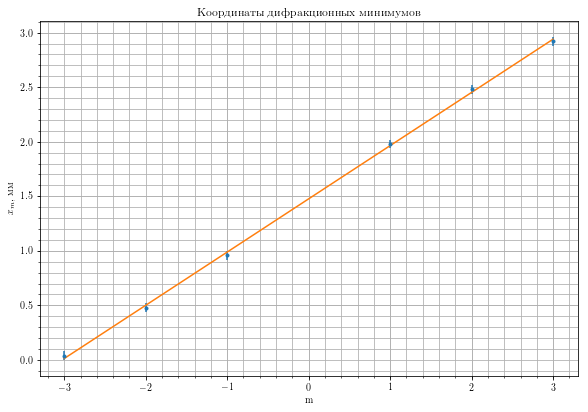

In [7]:
sxm=0.04
a,b,sa,sb,chi2=olsim(m,xm,zeros(len(m)),sxm)
print(a,b,sa,sb,chi2)
dX,sdX=a,sa #mm
errorbar(m,xm,yerr=sxm,fmt='.')
plot(m,a*m+b)
#graph options
xlabel("m")
ylabel(r"$x_m$, мм")
title("Координаты дифракционных минимумов")
minorticks_on()
grid(which='both')
tight_layout()
savefig("graph2.pdf")

In [8]:
f2=16 #cm
Db=f2*Lambda/dX*10 #mm
sDb=sdX/dX*Db
print(Db,sDb)

0.179101610542 0.00395593379276


# Part C

In [9]:
deltax=(2.06-1.08)/15 #mm
deltamax=2.06-1.08
sdeltamax=0.03
sdeltax=sdeltamax/15
print(deltax,sdeltax)
print(deltamax,sdeltamax)

0.06533333333333333 0.002
0.98 0.03


In [10]:
ds=10*f2*Lambda/deltax #mm
sds=ds*sdeltax/deltax
print(ds,sds)

1.3373877551020408 0.040940441482715535


In [11]:
bs=20*f2*Lambda/deltamax #mm
sbs=bs*sdeltamax/deltamax
print(bs,sbs)

0.17831836734693876 0.005458725531028737


In [12]:
f1=12.8 #cm
f1e=10*f1*Lambda/ds
sf1e=f1e*sds/ds
print(f1e,sf1e) #must be equal to b0

0.05226666666666667 0.0016000000000000003


# Part D

In [13]:
di=(2.32+2.52)/2-(0.88+1.18)/2
b1=1.18-0.88
b2=2.52-2.32
sdi=0.03
print(di,sdi,b1,b2)

1.39 0.03 0.29999999999999993 0.20000000000000018


In [14]:
D0=0.12 #mm
Dest=20*f1*Lambda/di
sDest=Dest*sdi/di
print(Dest,sDest) #must be equal to D0

0.10057669064748202 0.002170719942031986
